# Abdominal pain diagnoses with/without missed opportunities of diagnosis

In [2]:
import pandas as pd

In [3]:
diff_icds = pd.read_csv('../Devika/diff_icds.csv')

In [14]:
diff_icds['total'] = diff_icds['mod'] +  diff_icds['nomod']
diff_icds['proportion_mod'] = diff_icds['mod'] / diff_icds['total']

In [54]:
diff_icds

,Unnamed: 0,code,mod,nomod,total,proportion_mod
0,Unspecified abdominal pain,R10.9,10,31,41,0.243902
1,"Lower abdominal pain, unspecified",R10.30,0,20,20,0.000000
2,Generalized abdominal pain,R10.84,11,12,23,0.478261
3,Epigastric pain,R10.13,5,12,17,0.294118
4,Encntr for obs for oth suspected diseases and ...,Z03.89,4,8,12,0.333333
5,"Upper abdominal pain, unspecified",R10.10,4,8,12,0.333333
6,Encounter for screening for cardiovascular dis...,Z13.6,2,7,9,0.222222
7,Type 2 diabetes mellitus with hyperglycemia,E11.65,0,4,4,0.000000
8,Oth symptoms and signs involving the circ and ...,R09.89,1,4,5,0.200000
9,"Heart failure, unspecified",I50.9,0,2,2,0.000000


## Count of charts per each ICD code

<AxesSubplot:ylabel='Frequency'>

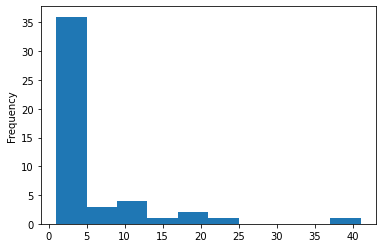

In [17]:
diff_icds['total'].plot.hist()

A lot of ICDs are strictly unique: used once and only once.

### How many ICDs altogether

In [21]:
len(diff_icds)

48

### How many ICDs are used 2 or more times

In [22]:
len(diff_icds[diff_icds.total > 1])

22

### Proportion of non-unique ICDs

In [23]:
len(diff_icds[diff_icds.total > 1]) / len(diff_icds)

0.4583333333333333

## Simple stats on MOD rates

In [42]:
n_mod = diff_icds['mod'].sum()
n_no_mod = diff_icds['nomod'].sum()
total = n_mod + n_no_mod
proportion_mod_global = n_mod / total

In [43]:
n_mod

91

In [44]:
n_no_mod

138

In [45]:
total

229

In [46]:
proportion_mod_global

0.39737991266375544

## Rank ICDs from most to least "error-prone"

In [64]:
non_uniq_icds = diff_icds[diff_icds.total > 1]
non_uniq_icds['mod_rate_above_mean'] = non_uniq_icds['proportion_mod'] - proportion_mod_global
# non_uniq_icds.loc[:, 'proportion_mod']


<ipython-input-64-94e60145fbf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_uniq_icds['mod_rate_above_mean'] = non_uniq_icds['proportion_mod'] - proportion_mod_global


In [65]:
non_uniq_icds.sort_values('proportion_mod', ascending=False)

,Unnamed: 0,code,mod,nomod,total,proportion_mod,mod_rate_above_mean
44,Palpitations,R00.2,2,0,2,1.000000,0.602620
38,"Hepatomegaly with splenomegaly, not elsewhere ...",R16.2,2,0,2,1.000000,0.602620
37,"Fever, unspecified",R50.9,14,0,14,1.000000,0.602620
36,Right lower quadrant pain,R10.31,6,0,6,1.000000,0.602620
13,"Nausea with vomiting, unspecified",R11.2,10,2,12,0.833333,0.435953
24,"Tachycardia, unspecified",R00.0,4,1,5,0.800000,0.402620
32,Left lower quadrant pain,R10.32,3,1,4,0.750000,0.352620
21,Other nonspecific abnormal finding of lung field,R91.8,3,1,4,0.750000,0.352620
25,Cough,R05.,2,1,3,0.666667,0.269287
2,Generalized abdominal pain,R10.84,11,12,23,0.478261,0.080881


## Focus only on ICDs with count > 2

In [67]:
non_uniq_icds[non_uniq_icds.total > 2].sort_values('proportion_mod', ascending=False)

,Unnamed: 0,code,mod,nomod,total,proportion_mod,mod_rate_above_mean
36,Right lower quadrant pain,R10.31,6,0,6,1.000000,0.602620
37,"Fever, unspecified",R50.9,14,0,14,1.000000,0.602620
13,"Nausea with vomiting, unspecified",R11.2,10,2,12,0.833333,0.435953
24,"Tachycardia, unspecified",R00.0,4,1,5,0.800000,0.402620
21,Other nonspecific abnormal finding of lung field,R91.8,3,1,4,0.750000,0.352620
32,Left lower quadrant pain,R10.32,3,1,4,0.750000,0.352620
25,Cough,R05.,2,1,3,0.666667,0.269287
2,Generalized abdominal pain,R10.84,11,12,23,0.478261,0.080881
4,Encntr for obs for oth suspected diseases and ...,Z03.89,4,8,12,0.333333,-0.064047
5,"Upper abdominal pain, unspecified",R10.10,4,8,12,0.333333,-0.064047
